In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statistics
import statsmodels.graphics.gofplots as statMode
from matplotlib import cm
from scipy.special import factorial
from scipy.stats import norm
from scipy import stats

In [95]:
chromeCastData = pd.read_csv("dataset_chromecast.csv")
smartTVData = pd.read_csv("dataset_smart-tv.csv")
smartTVData.head()


,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05


In [96]:
#Adicionando a coluna de hora nos dataframes
smartTVData['hora'] = pd.to_datetime(smartTVData['date_hour']).dt.hour
chromeCastData['hora'] = pd.to_datetime(chromeCastData['date_hour']).dt.hour
chromeCastData.head()

,device_id,date_hour,bytes_up,bytes_down,hora
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918,0
1,66161985,2021-09-06 00:02:00,685.935484,328.258065,0
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516,0
3,66161985,2021-09-06 00:04:00,776.133333,229.200000,0
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000,0


In [97]:
chromeCastData.head()

,device_id,date_hour,bytes_up,bytes_down,hora
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918,0
1,66161985,2021-09-06 00:02:00,685.935484,328.258065,0
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516,0
3,66161985,2021-09-06 00:04:00,776.133333,229.200000,0
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000,0


Convertendo dados para escala logarítimica

In [98]:
def log10(x):
    if x == 0:
        return 0
        
    return math.log10(x)

chromeCastData

chromeCastData['bytes_up_log10'] = chromeCastData['bytes_up'].apply(log10)
chromeCastData['bytes_down_log10'] = chromeCastData['bytes_down'].apply(log10)

smartTVData['bytes_up_log10'] = smartTVData['bytes_up'].apply(log10)
smartTVData['bytes_down_log10'] = smartTVData['bytes_down'].apply(log10)

Histograma

In [99]:
#Regra de Sturge's para numero de bins
n_bins_chromeCast = math.trunc(1 + 3.3*math.log10(len(chromeCastData)))
print("Bins chromecast: " + str(n_bins_chromeCast))
n_bins_smartTv = math.trunc(1 + 3.3*math.log10(len(smartTVData)))
print("Bins smartTv: " + str(n_bins_smartTv))

Bins chromecast: 21
Bins smartTv: 22


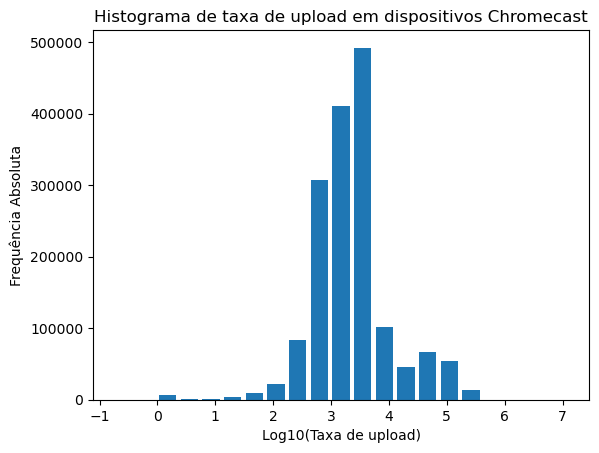

In [100]:
plt.hist(chromeCastData['bytes_up_log10'], n_bins_chromeCast, rwidth=0.8)
plt.title("Histograma de taxa de upload em dispositivos Chromecast")
plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de upload)')
plt.show()

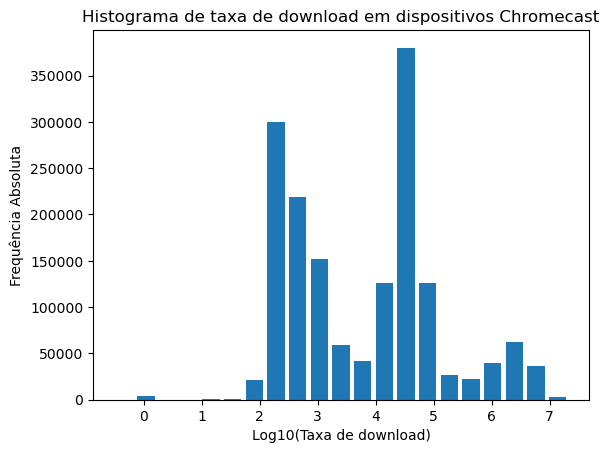

In [101]:
plt.hist(chromeCastData['bytes_down_log10'], n_bins_chromeCast, rwidth=0.8)
plt.title("Histograma de taxa de download em dispositivos Chromecast")
plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de download)')
plt.show()

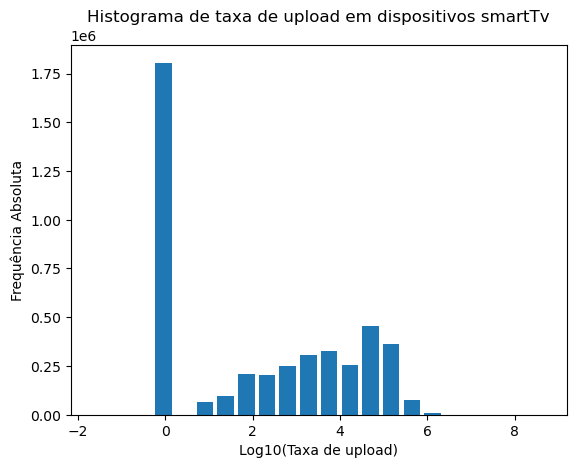

In [102]:
plt.hist(smartTVData['bytes_up_log10'], n_bins_smartTv, rwidth=0.8)
plt.title("Histograma de taxa de upload em dispositivos smartTv")
plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de upload)')
plt.show()

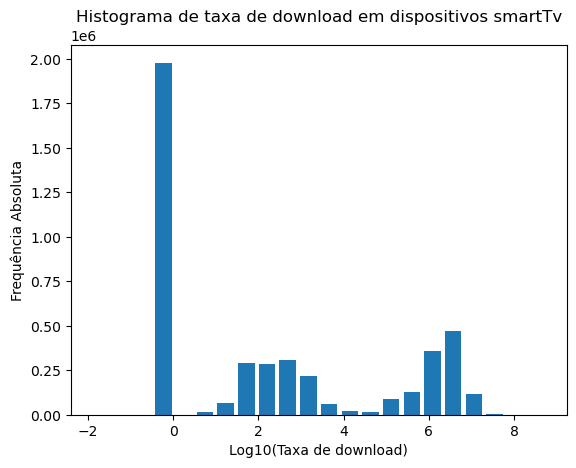

In [103]:
plt.hist(smartTVData['bytes_down_log10'], n_bins_smartTv, rwidth=0.8)
plt.title("Histograma de taxa de download em dispositivos smartTv")
plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de download)')
plt.show()

Função de distribuição empírica

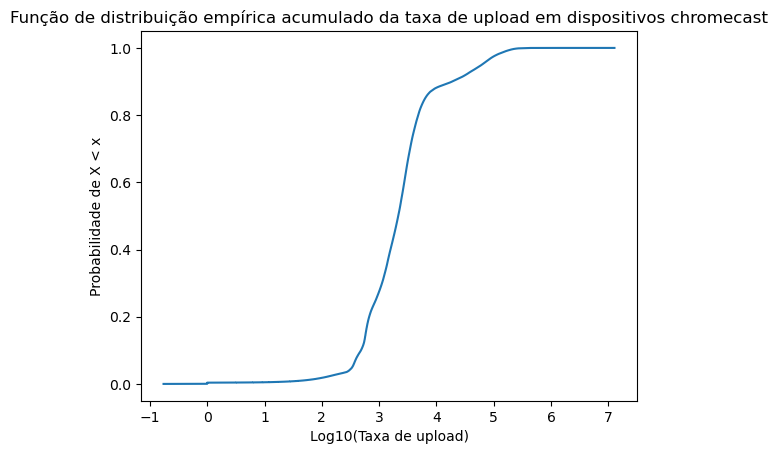

In [104]:
x_tmp = chromeCastData['bytes_up_log10'].copy().to_numpy()
x_tmp.sort()
y_tmp = p = 1.0 * np.arange(len(x_tmp)) / float(len(x_tmp) - 1)

plt.plot(x_tmp,y_tmp)
plt.title("Função de distribuição empírica acumulado da taxa de upload em dispositivos chromecast")
plt.ylabel('Probabilidade de X < x')
plt.xlabel('Log10(Taxa de upload)')
plt.show()

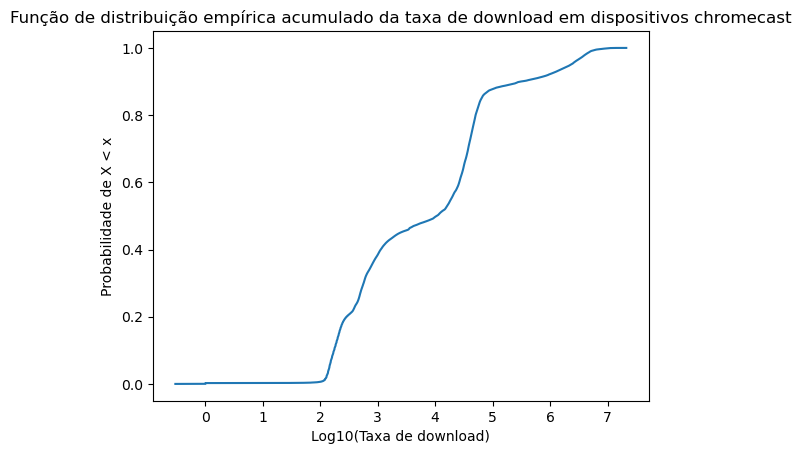

In [105]:
x_tmp = chromeCastData['bytes_down_log10'].copy().to_numpy()
x_tmp.sort()
y_tmp = p = 1.0 * np.arange(len(x_tmp)) / float(len(x_tmp) - 1)

plt.plot(x_tmp,y_tmp)
plt.title("Função de distribuição empírica acumulado da taxa de download em dispositivos chromecast")
plt.ylabel('Probabilidade de X < x')
plt.xlabel('Log10(Taxa de download)')
plt.show()

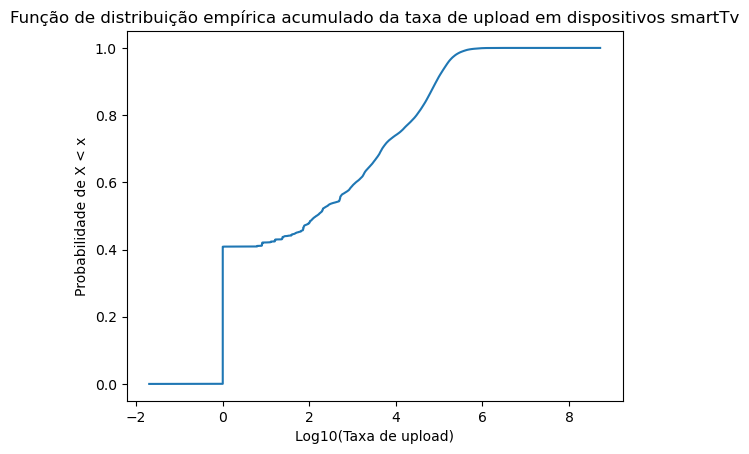

In [106]:
x_tmp = smartTVData['bytes_up_log10'].copy().to_numpy()
x_tmp.sort()
y_tmp = p = 1.0 * np.arange(len(x_tmp)) / float(len(x_tmp) - 1)

plt.plot(x_tmp,y_tmp)
plt.title("Função de distribuição empírica acumulado da taxa de upload em dispositivos smartTv")
plt.ylabel('Probabilidade de X < x')
plt.xlabel('Log10(Taxa de upload)')
plt.show()

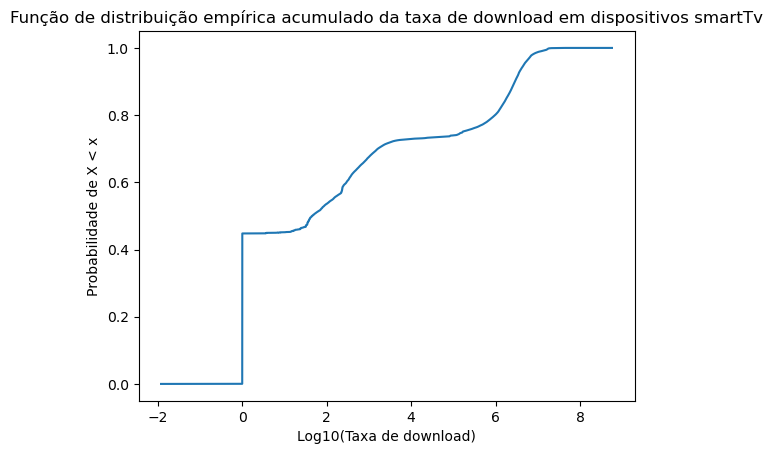

In [107]:
x_tmp = smartTVData['bytes_down_log10'].copy().to_numpy()
x_tmp.sort()
y_tmp = p = 1.0 * np.arange(len(x_tmp)) / float(len(x_tmp) - 1)

plt.plot(x_tmp,y_tmp)
plt.title("Função de distribuição empírica acumulado da taxa de download em dispositivos smartTv")
plt.ylabel('Probabilidade de X < x')
plt.xlabel('Log10(Taxa de download)')
plt.show()

BoxPlot

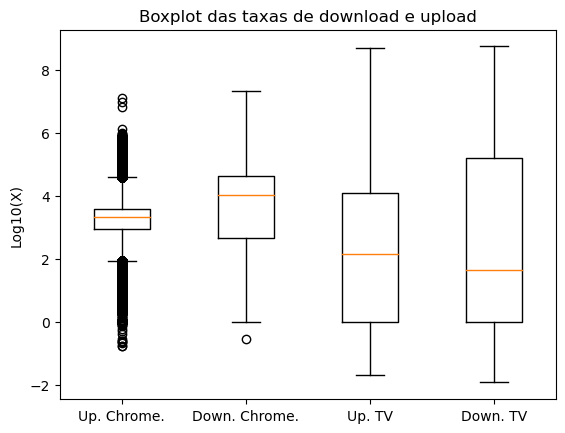

In [108]:
plt.boxplot([chromeCastData['bytes_up_log10'],chromeCastData['bytes_down_log10'], smartTVData['bytes_up_log10'], smartTVData['bytes_down_log10']], labels=['Up. Chrome.', 'Down. Chrome.','Up. TV', 'Down. TV'])
plt.title("Boxplot das taxas de download e upload")
plt.ylabel('Log10(X)')
plt.show()

Medidas de dispersão

In [109]:
display("----Chromecast----")
display("Media upload: " + str(statistics.mean(chromeCastData['bytes_up_log10'])))
display("Variância upload: " + str(statistics.variance(chromeCastData['bytes_up_log10'])))
display("Desvio padrão upload: " + str(statistics.stdev(chromeCastData['bytes_up_log10'])))
display("Media download: " + str(statistics.mean(chromeCastData['bytes_down_log10'])))
display("Variância download: " + str(statistics.variance(chromeCastData['bytes_down_log10'])))
display("Desvio padrão download: " + str(statistics.stdev(chromeCastData['bytes_down_log10'])))

'----Chromecast----'

'Media upload: 3.3496717251158703'

'Variância upload: 0.46160016892790356'

'Desvio padrão upload: 0.6794116343777927'

'Media download: 3.799335488086478'

'Variância download: 1.6659798143232278'

'Desvio padrão download: 1.2907284045542764'

In [110]:
display("----SmartTv----")
display("Media upload: " + str(statistics.mean(smartTVData['bytes_up_log10'])))
display("Variância upload: " + str(statistics.variance(smartTVData['bytes_up_log10'])))
display("Desvio padrão upload: " + str(statistics.stdev(smartTVData['bytes_up_log10'])))
display("Media download: " + str(statistics.mean(smartTVData['bytes_down_log10'])))
display("Variância download: " + str(statistics.variance(smartTVData['bytes_down_log10'])))
display("Desvio padrão download: " + str(statistics.stdev(smartTVData['bytes_down_log10'])))

'----SmartTv----'

'Media upload: 2.1565902037563744'

'Variância upload: 4.113082752316163'

'Desvio padrão upload: 2.028073655545124'

'Media download: 2.350172639895904'

'Variância download: 6.723920763635552'

'Desvio padrão download: 2.5930524027939645'

MEDIDAS HORÁRIAS

In [111]:
media_up = []
var_up = []
desvPad_up = []
media_down = []
var_down = []
desvPad_down = []
for i in range(24):
    tmp = statistics.mean(chromeCastData[chromeCastData['hora'] == i]['bytes_up_log10'])
    media_up.append(tmp)
    #display("Media upload hora " + str(i) + ": " + str(tmp))
    tmp = statistics.variance(chromeCastData[chromeCastData['hora'] == i]['bytes_up_log10'])
    var_up.append(tmp)
    #display("Variância upload hora " + str(i) + ": " + str(tmp))
    tmp = statistics.stdev(chromeCastData[chromeCastData['hora'] == i]['bytes_up_log10'])
    desvPad_up.append(tmp)
    #display("Desvio padrão upload hora " + str(i) + ": " + str(tmp))
    tmp = statistics.mean(chromeCastData[chromeCastData['hora'] == i]['bytes_down_log10'])
    media_down.append(tmp)
    #display("Media download hora " + str(i) + ": " + str(tmp))
    tmp = statistics.variance(chromeCastData[chromeCastData['hora'] == i]['bytes_down_log10'])
    var_down.append(tmp)
    #display("Variância download hora " + str(i) + ": " + str(tmp))
    tmp = statistics.stdev(chromeCastData[chromeCastData['hora'] == i]['bytes_down_log10'])
    desvPad_down.append(tmp)
    #display("Desvio padrão download hora " + str(i) + ": " + str(tmp))  



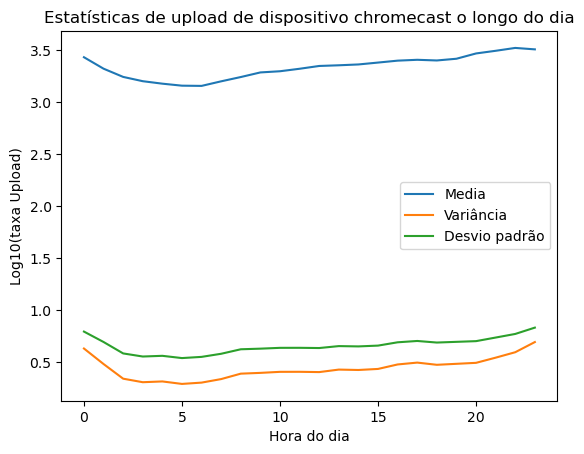

In [112]:
plt.plot(media_up,label="Media")
plt.plot(var_up,label="Variância")
plt.plot(desvPad_up,label="Desvio padrão")
plt.legend()
plt.title("Estatísticas de upload de dispositivo chromecast o longo do dia")
plt.xlabel("Hora do dia")
plt.ylabel("Log10(taxa Upload)")
plt.show()

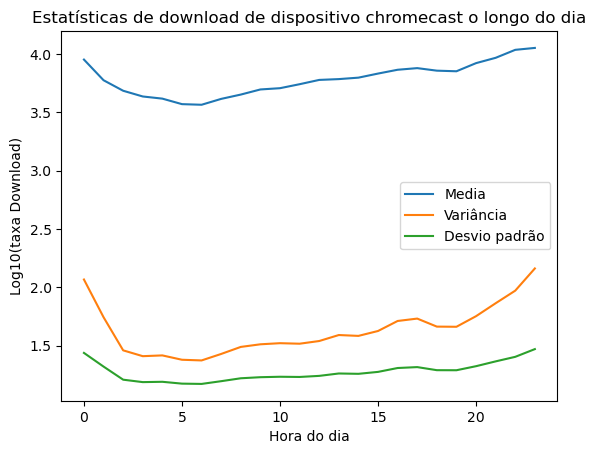

In [113]:
plt.plot(media_down,label="Media")
plt.plot(var_down,label="Variância")
plt.plot(desvPad_down,label="Desvio padrão")
plt.legend()
plt.title("Estatísticas de download de dispositivo chromecast o longo do dia")
plt.xlabel("Hora do dia")
plt.ylabel("Log10(taxa Download)")
plt.show()

In [114]:
media_up = []
var_up = []
desvPad_up = []
media_down = []
var_down = []
desvPad_down = []
for i in range(24):
    tmp = statistics.mean(smartTVData[smartTVData['hora'] == i]['bytes_up_log10'])
    media_up.append(tmp)
    #display("Media upload hora " + str(i) + ": " + str(tmp))
    tmp = statistics.variance(smartTVData[smartTVData['hora'] == i]['bytes_up_log10'])
    var_up.append(tmp)
    #display("Variância upload hora " + str(i) + ": " + str(tmp))
    tmp = statistics.stdev(smartTVData[smartTVData['hora'] == i]['bytes_up_log10'])
    desvPad_up.append(tmp)
    #display("Desvio padrão upload hora " + str(i) + ": " + str(tmp))
    tmp = statistics.mean(smartTVData[smartTVData['hora'] == i]['bytes_down_log10'])
    media_down.append(tmp)
    #display("Media download hora " + str(i) + ": " + str(tmp))
    tmp = statistics.variance(smartTVData[smartTVData['hora'] == i]['bytes_down_log10'])
    var_down.append(tmp)
    #display("Variância download hora " + str(i) + ": " + str(tmp))
    tmp = statistics.stdev(smartTVData[smartTVData['hora'] == i]['bytes_down_log10'])
    desvPad_down.append(tmp)
    #display("Desvio padrão download hora " + str(i) + ": " + str(tmp))  



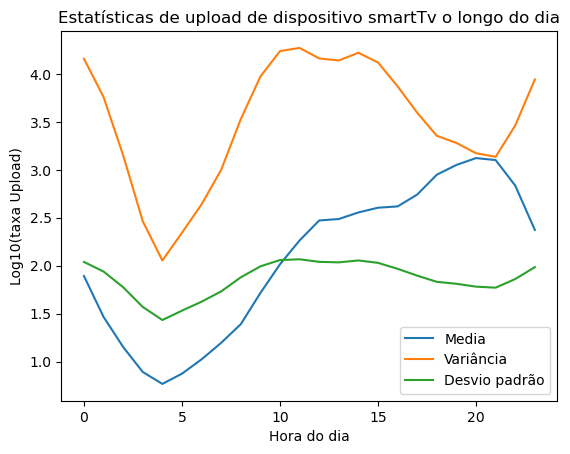

In [115]:
plt.plot(media_up,label="Media")
plt.plot(var_up,label="Variância")
plt.plot(desvPad_up,label="Desvio padrão")
plt.legend()
plt.title("Estatísticas de upload de dispositivo smartTv o longo do dia")
plt.xlabel("Hora do dia")
plt.ylabel("Log10(taxa Upload)")
plt.show()

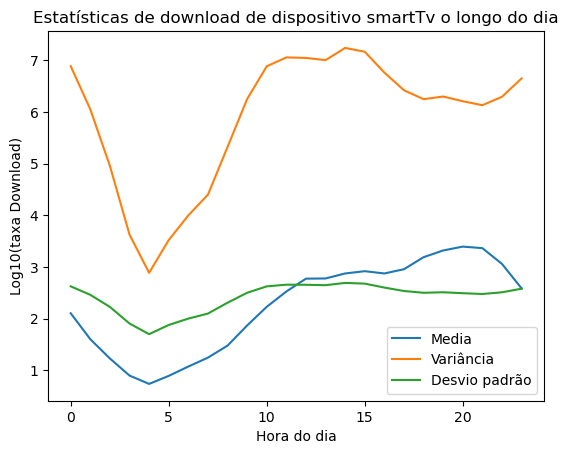

In [116]:
plt.plot(media_down,label="Media")
plt.plot(var_down,label="Variância")
plt.plot(desvPad_down,label="Desvio padrão")
plt.legend()
plt.title("Estatísticas de download de dispositivo smartTv o longo do dia")
plt.xlabel("Hora do dia")
plt.ylabel("Log10(taxa Download)")
plt.show()

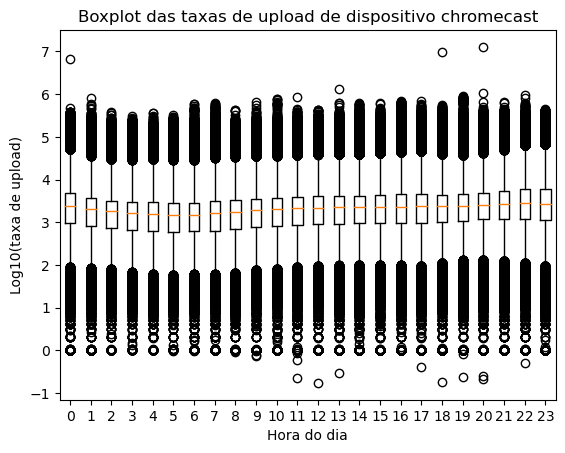

In [117]:
plt.boxplot([chromeCastData[chromeCastData['hora'] == 0]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 1]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 2]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 3]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 4]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 5]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 6]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 7]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 8]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 9]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 10]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 11]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 12]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 13]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 14]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 15]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 16]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 17]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 18]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 19]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 20]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 21]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 22]['bytes_up_log10'],
             chromeCastData[chromeCastData['hora'] == 23]['bytes_up_log10'],
             ], labels=['0', '1','2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.title("Boxplot das taxas de upload de dispositivo chromecast")
plt.ylabel('Log10(taxa de upload)')
plt.xlabel('Hora do dia')
plt.show()

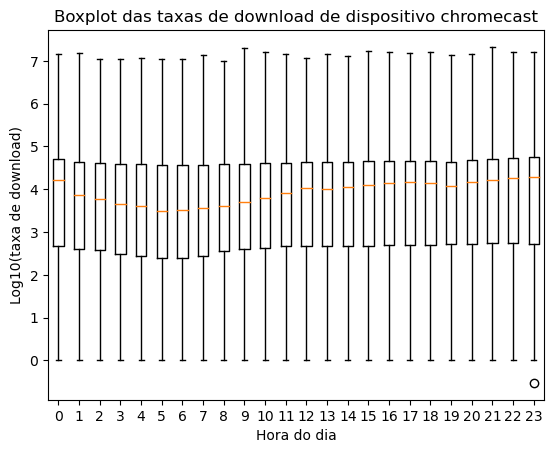

In [118]:
plt.boxplot([chromeCastData[chromeCastData['hora'] == 0]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 1]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 2]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 3]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 4]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 5]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 6]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 7]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 8]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 9]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 10]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 11]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 12]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 13]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 14]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 15]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 16]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 17]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 18]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 19]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 20]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 21]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 22]['bytes_down_log10'],
             chromeCastData[chromeCastData['hora'] == 23]['bytes_down_log10'],
             ], labels=['0', '1','2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.title("Boxplot das taxas de download de dispositivo chromecast")
plt.ylabel('Log10(taxa de download)')
plt.xlabel('Hora do dia')
plt.show()

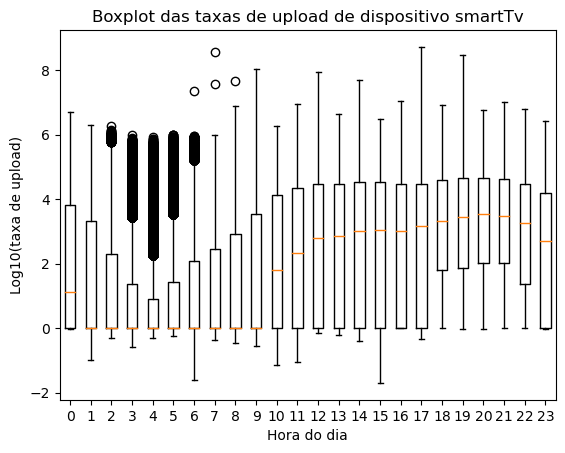

In [119]:
plt.boxplot([smartTVData[smartTVData['hora'] == 0]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 1]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 2]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 3]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 4]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 5]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 6]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 7]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 8]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 9]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 10]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 11]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 12]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 13]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 14]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 15]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 16]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 17]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 18]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 19]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 20]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 21]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 22]['bytes_up_log10'],
             smartTVData[smartTVData['hora'] == 23]['bytes_up_log10'],
             ], labels=['0', '1','2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.title("Boxplot das taxas de upload de dispositivo smartTv")
plt.ylabel('Log10(taxa de upload)')
plt.xlabel('Hora do dia')
plt.show()

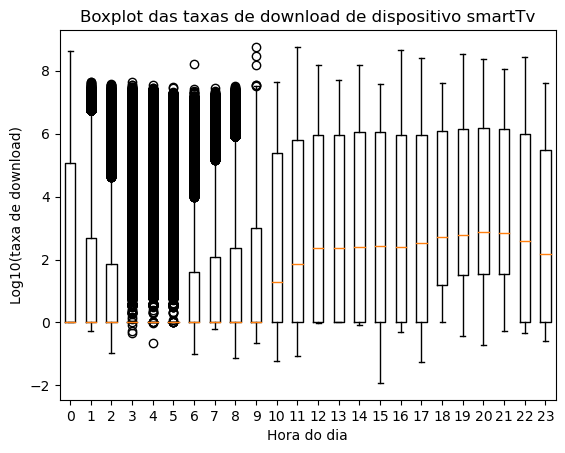

In [120]:
plt.boxplot([smartTVData[smartTVData['hora'] == 0]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 1]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 2]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 3]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 4]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 5]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 6]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 7]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 8]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 9]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 10]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 11]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 12]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 13]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 14]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 15]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 16]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 17]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 18]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 19]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 20]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 21]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 22]['bytes_down_log10'],
             smartTVData[smartTVData['hora'] == 23]['bytes_down_log10'],
             ], labels=['0', '1','2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.title("Boxplot das taxas de download de dispositivo smartTv")
plt.ylabel('Log10(taxa de download)')
plt.xlabel('Hora do dia')
plt.show()

In [121]:
h_maior_media_upload_chromecast = 0
maior_media_upload_chromecast = statistics.mean(chromeCastData[chromeCastData['hora'] == 0]['bytes_up_log10'])

h_maior_media_down_chromecast = 0
maior_media_down_chromecast = statistics.mean(chromeCastData[chromeCastData['hora'] == 0]['bytes_down_log10'])

h_maior_media_upload_smartTv = 0
maior_media_upload_smartTv = statistics.mean(smartTVData[smartTVData['hora'] == 0]['bytes_up_log10'])

h_maior_media_down_smartTv = 0
maior_media_down_smartTv = statistics.mean(smartTVData[smartTVData['hora'] == 0]['bytes_down_log10'])

for i in range(24):
    tmp = statistics.mean(chromeCastData[chromeCastData['hora'] == i]['bytes_up_log10'])
    if tmp > maior_media_upload_chromecast:
        maior_media_upload_chromecast = tmp
        h_maior_media_upload_chromecast = i

    tmp = statistics.mean(chromeCastData[chromeCastData['hora'] == i]['bytes_down_log10'])
    if tmp > maior_media_down_chromecast:
        maior_media_down_chromecast = tmp
        h_maior_media_down_chromecast = i

    tmp = statistics.mean(smartTVData[smartTVData['hora'] == i]['bytes_up_log10'])
    if tmp > maior_media_upload_smartTv:
        maior_media_upload_smartTv = tmp
        h_maior_media_upload_smartTv = i

    tmp = statistics.mean(smartTVData[smartTVData['hora'] == i]['bytes_down_log10'])
    if tmp > maior_media_down_smartTv:
        maior_media_down_smartTv = tmp
        h_maior_media_down_smartTv = i


display("Upload Chromecast pos: " + str(h_maior_media_upload_chromecast))
display("Download Chromecast pos: " + str(h_maior_media_down_chromecast))
display("Upload SmartTv pos: " + str(h_maior_media_upload_smartTv))
display("Download SmartTv pos: " + str(h_maior_media_down_smartTv))


#Correção para horario de upload ser igual ao horario de download
if (h_maior_media_down_chromecast != h_maior_media_upload_chromecast):
    h_maior_media_upload_chromecast = h_maior_media_down_chromecast
    display("Correcao media Download e upload Chromecast: " + str(h_maior_media_down_chromecast) + "  " + str(h_maior_media_upload_chromecast))

if (h_maior_media_down_smartTv != h_maior_media_upload_smartTv):
    h_maior_media_upload_smartTv = h_maior_media_down_smartTv
    display("Correcao media Download e upload SmartTv: " + str(h_maior_media_down_smartTv) + "  " + str(h_maior_media_upload_smartTv))

'Upload Chromecast pos: 22'

'Download Chromecast pos: 23'

'Upload SmartTv pos: 20'

'Download SmartTv pos: 20'

'Correcao media Download e upload Chromecast: 23  23'

In [122]:
dataSet_maior_media_down_chromecast = chromeCastData[chromeCastData['hora'] == h_maior_media_down_chromecast]['bytes_down_log10']

dataSet_maior_media_up_chromecast = chromeCastData[chromeCastData['hora'] == h_maior_media_upload_chromecast]['bytes_up_log10']

dataSet_maior_media_down_smartTv = smartTVData[smartTVData['hora'] == h_maior_media_down_smartTv]['bytes_down_log10']

dataSet_maior_media_up_smartTv = smartTVData[smartTVData['hora'] == h_maior_media_upload_smartTv]['bytes_up_log10']

Bins: 17


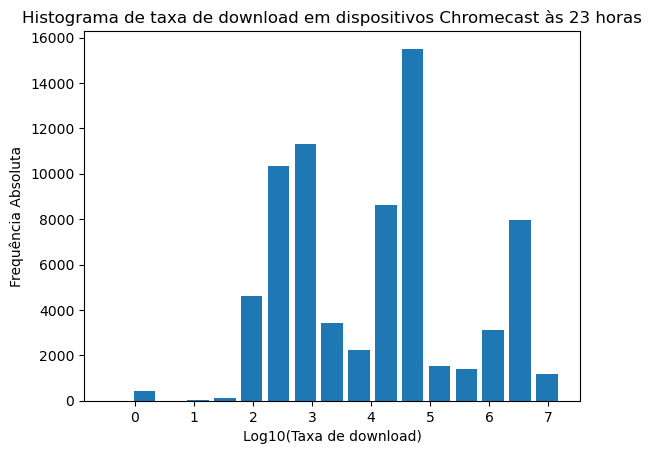

In [123]:
#Regra de Sturge's para numero de bins
n_bins = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_down_chromecast)))
print("Bins: " + str(n_bins))

plt.hist(dataSet_maior_media_down_chromecast, n_bins, rwidth=0.8)
plt.title("Histograma de taxa de download em dispositivos Chromecast às " + str(h_maior_media_down_chromecast) + " horas")
plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de download)')
plt.show()

Bins: 17


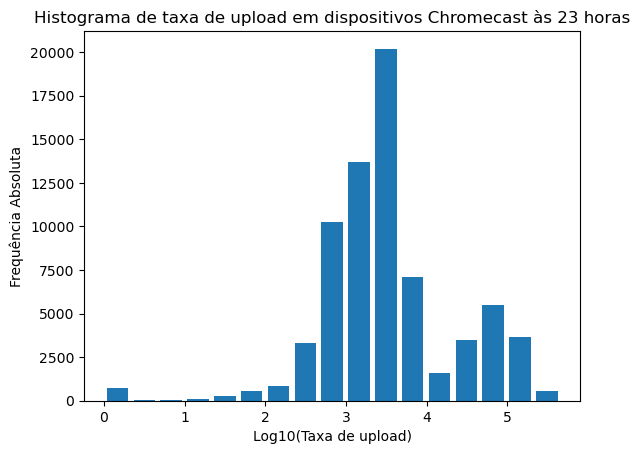

In [124]:
#Regra de Sturge's para numero de bins
n_bins = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_up_chromecast)))
print("Bins: " + str(n_bins))

plt.hist(dataSet_maior_media_up_chromecast, n_bins, rwidth=0.8)
plt.title("Histograma de taxa de upload em dispositivos Chromecast às " + str(h_maior_media_upload_chromecast) + " horas")
plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de upload)')
plt.show()

Bins: 18


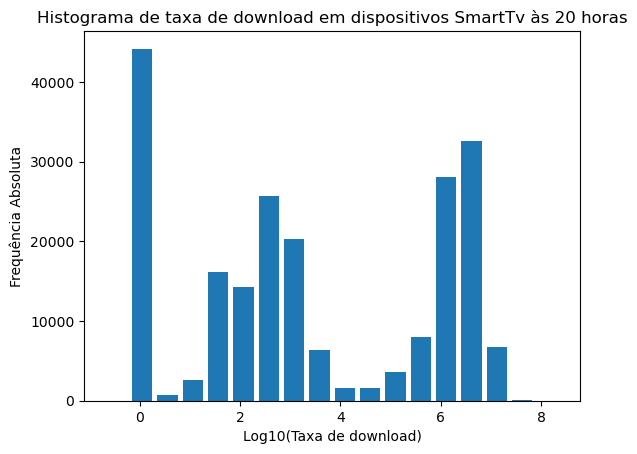

In [125]:
#Regra de Sturge's para numero de bins
n_bins = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_down_smartTv)))
print("Bins: " + str(n_bins))

plt.hist(dataSet_maior_media_down_smartTv, n_bins, rwidth=0.8)
plt.title("Histograma de taxa de download em dispositivos SmartTv às " + str(h_maior_media_down_smartTv) + " horas")
plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de download)')
plt.show()

Bins: 18


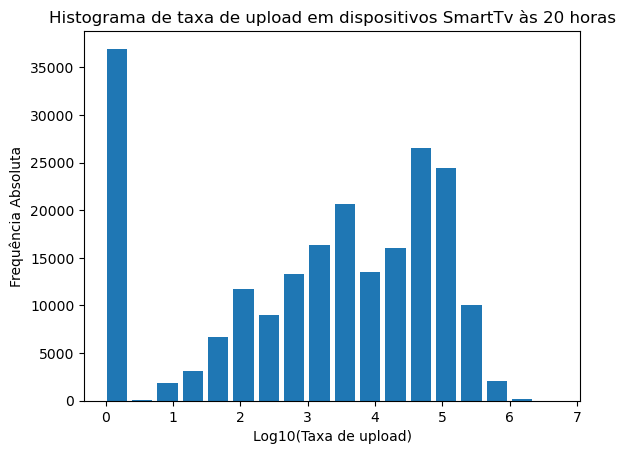

In [126]:
#Regra de Sturge's para numero de bins
n_bins = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_up_smartTv)))
print("Bins: " + str(n_bins))

plt.hist(dataSet_maior_media_up_smartTv, n_bins, rwidth=0.8)
plt.title("Histograma de taxa de upload em dispositivos SmartTv às " + str(h_maior_media_upload_smartTv) + " horas")
plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de upload)')
plt.show()

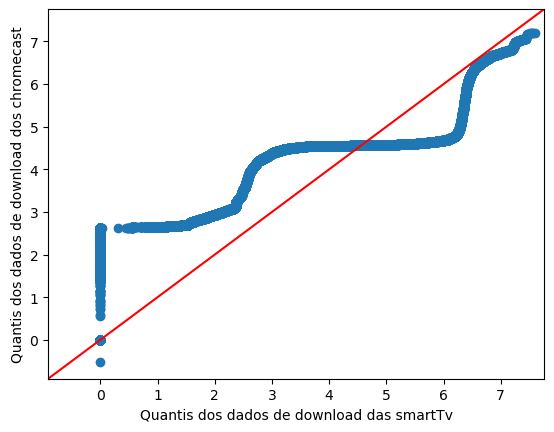

In [127]:
statMode.qqplot_2samples(dataSet_maior_media_down_chromecast,dataSet_maior_media_down_smartTv, ylabel="Quantis dos dados de download das smartTv",
                         xlabel="Quantis dos dados de download dos chromecast",line="45")
plt.show()

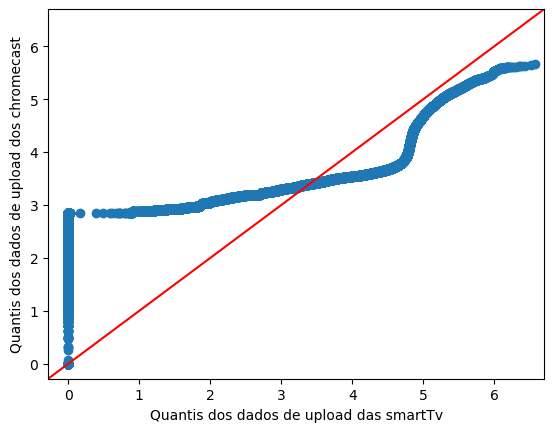

In [128]:
statMode.qqplot_2samples(dataSet_maior_media_up_chromecast,dataSet_maior_media_up_smartTv, ylabel="Quantis dos dados de upload das smartTv",
                         xlabel="Quantis dos dados de upload dos chromecast", line="45")

plt.show()


Likelihood - Gaussiana

In [129]:
def calcGaussLikelihood(x,med,var):
    likelihood = 1

    for i in x:
        gauss = (1/(math.sqrt(2*math.pi*var)))*math.exp((-1)*(((i-med)^2)/(2*var)))
        likelihood = likelihood*gauss

    return likelihood


def calcGaussLogLikelihood(x,med,var):
    likelihood = 0

    for i in x:
        gauss = np.log((1/(np.sqrt(2*math.pi*var))))  + (-1)*(((i-med)**2)/(2*var))
        likelihood = likelihood + gauss

    return likelihood


def calcGammaLogLikelihood(x,k,t):
    def logMod(x):
        if (x==0):
            return 0

    likelihood = 0
    n = np.shape(x)[0]
    s = 0
    ls = 0
    for i in x:
        s = s + i
        if i != 0:
            ls = ls + math.log(i)


    likelihood = -n*(np.log(factorial(k-1))) -n*k*np.log(t) + (k-1)*ls - s/t

    return likelihood



Download Chromecast

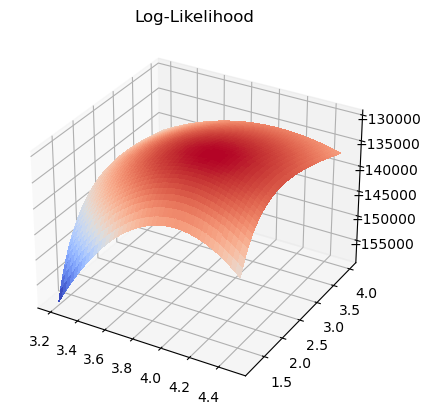

In [130]:
med = np.arange(3.2,4.5,0.01)
var = np.arange(1.2,4,0.01)

med,var = np.meshgrid(med,var)

#Download Chromecast
Z = calcGaussLogLikelihood(dataSet_maior_media_down_chromecast.to_numpy(),med,var)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(med, var, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("Log-Likelihood")
plt.show()

#Encontrando os parâmetros da gaussiana que melhor se ajusta aos dados
l,c = np.unravel_index(np.argmax(Z, axis=None), Z.shape)

med_down_chromecast = med[l][c]
var_down_chromecast = var[l][c]

In [131]:
display(med_down_chromecast)
display(var_down_chromecast)

4.049999999999982

2.160000000000001

Upload Chromecast

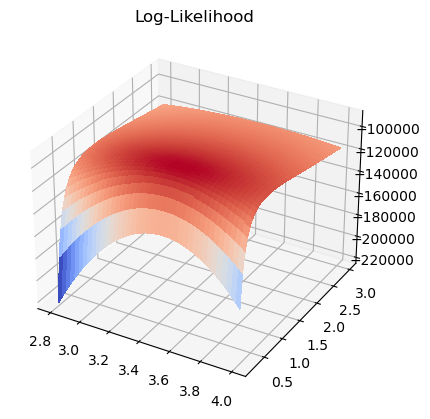

In [132]:
med = np.arange(2.8,4,0.01)
var = np.arange(0.2,3,0.01)

med,var = np.meshgrid(med,var)

#Upload Chromecast
Z = calcGaussLogLikelihood(dataSet_maior_media_up_chromecast.to_numpy(),med,var)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(med, var, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("Log-Likelihood")
plt.show()

#Encontrando os parâmetros da gaussiana que melhor se ajusta aos dados
l,c = np.unravel_index(np.argmax(Z, axis=None), Z.shape)

med_up_chromecast = med[l][c]
var_up_chromecast = var[l][c]

In [133]:
display(med_up_chromecast)
display(var_up_chromecast)

3.5099999999999847

0.6900000000000004

Download SmartTV

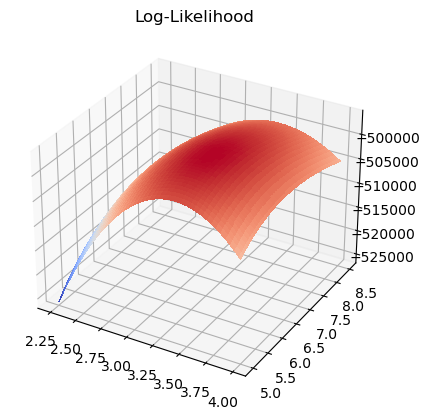

In [134]:
med = np.arange(2.25,4,0.01)
var = np.arange(5,8.5,0.01)

med,var = np.meshgrid(med,var)

#Download SmartTv
Z = calcGaussLogLikelihood(dataSet_maior_media_down_smartTv.to_numpy(),med,var)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(med, var, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("Log-Likelihood")
plt.show()

#Encontrando os parâmetros da gaussiana que melhor se ajusta aos dados
l,c = np.unravel_index(np.argmax(Z, axis=None), Z.shape)

med_down_smartTv = med[l][c]
var_down_smartTv = var[l][c]

In [135]:
display(med_down_smartTv)
display(var_down_smartTv)

3.3899999999999757

6.209999999999974

Upload SmarTv

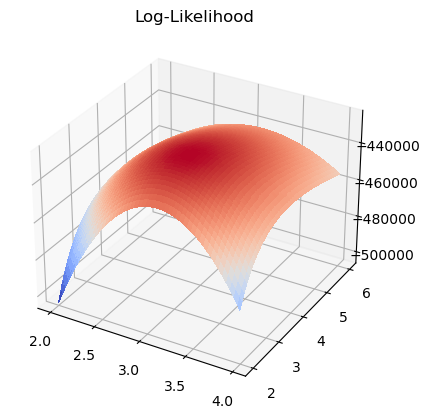

In [136]:
med = np.arange(2,4,0.01)
var = np.arange(2,6,0.01)

med,var = np.meshgrid(med,var)

#Upload SmartTv
Z = calcGaussLogLikelihood(dataSet_maior_media_up_smartTv.to_numpy(),med,var)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(med, var, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("Log-Likelihood")
plt.show()

#Encontrando os parâmetros da gaussiana que melhor se ajusta aos dados
l,c = np.unravel_index(np.argmax(Z, axis=None), Z.shape)

med_up_smartTv = med[l][c]
var_up_smartTv = var[l][c]

In [137]:
display(med_up_smartTv)
display(var_up_smartTv)

3.119999999999976

3.169999999999975

Parametros das distribuições gamma

In [138]:
a_down_chromecast,loc_down_chromecast,scale_down_chromecast = stats.gamma.fit(dataSet_maior_media_down_chromecast)
a_up_chromecast,loc_up_chromecast,scale_up_chromecast = stats.gamma.fit(dataSet_maior_media_up_chromecast)
a_down_smartTv,loc_down_smartTv,scale_down_smartTv = stats.gamma.fit(dataSet_maior_media_down_smartTv)
a_up_smartTv,loc_up_smartTv,scale_up_smartTv = stats.gamma.fit(dataSet_maior_media_up_smartTv)

display("Down Chromecast - Alfa: " + str(a_down_chromecast) + " beta: " + str(1/scale_down_chromecast) + " desloc: " + str(loc_down_chromecast))
display("Up Chromecast - Alfa: " + str(a_up_chromecast) + " beta: " + str(1/scale_up_chromecast) + " desloc: " + str(loc_up_chromecast))
display("Down SmartTv - Alfa: " + str(a_down_smartTv) + " beta: " + str(1/scale_down_smartTv) + " desloc: " + str(loc_down_smartTv))
display("up SmartTv - Alfa: " + str(a_up_smartTv) + " beta: " + str(1/scale_up_smartTv) + " desloc: " + str(loc_up_smartTv))


'Down Chromecast - Alfa: 27.264762975234554 beta: 3.537599737103029 desloc: -3.6550707752725704'

'Up Chromecast - Alfa: 504.9371237938725 beta: 26.638638118508656 desloc: -15.45144435803665'

'Down SmartTv - Alfa: 893.3317361585573 beta: 11.995895500152777 desloc: -71.07563105104046'

'up SmartTv - Alfa: 209.5414387375581 beta: 7.920048154365534 desloc: -23.34040210230087'

FUNÇÕES PARA GERAR DADOS DA GAUSSIANA E DA FUNÇÃO GAMMA PARA OS DADOS

In [139]:
def calcGaussiana(X,media,variancia):
    Y = 0
    Y = (1/(math.sqrt(2*math.pi*variancia)))*np.exp((-1)*(((X-media)**2)/(2*variancia)))
    return Y

def calcGamma(X,k,t):
    Y = 0
    Y = (1/(factorial(k-1)*(math.pow(t,k))))*(X**(k-1))*np.exp(-X/t)
    return Y

def calcGammaBib(X,a,loc,scale):
    return stats.gamma.pdf(X,a,loc,scale)

Chromecast Download

Bins: 17


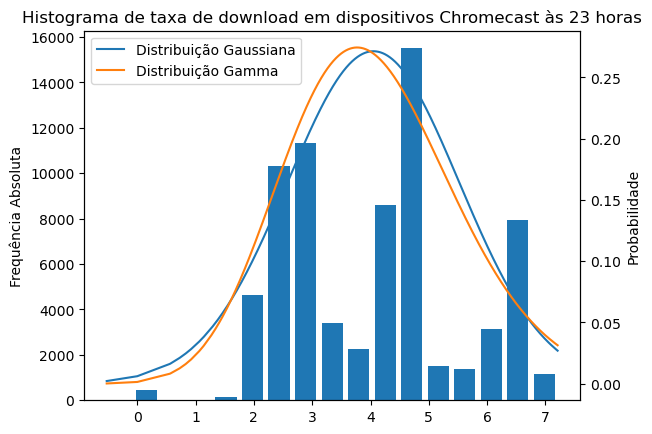

In [140]:
#Regra de Sturge's para numero de bins
n_bins = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_down_chromecast)))
print("Bins: " + str(n_bins))

cp_dtset = dataSet_maior_media_down_chromecast.copy().sort_values()

gauss = calcGaussiana(cp_dtset,med_down_chromecast,var_down_chromecast)

#DadosFUncaoGamaErrados
#gamma = calcGamma(dataSet_maior_media_down_chromecast,k_down_chromecast,t_down_chromecast)
gamma = calcGammaBib(cp_dtset,a_down_chromecast,loc_down_chromecast,scale_down_chromecast)

# Cria figura com eixo Y na esquerda (padrão), e plota dados nele
figure, left_ax = plt.subplots()
left_ax.hist(dataSet_maior_media_down_chromecast, n_bins, rwidth=0.8)
left_ax.set_ylabel('Frequência Absoluta')

# Cria eixo Y na direita e plota dados nele
right_ax = left_ax.twinx()
right_ax.plot(cp_dtset,gauss,label="Distribuição Gaussiana")
right_ax.plot(cp_dtset,gamma, label="Distribuição Gamma")
right_ax.set_ylabel('Probabilidade')


#plt.hist(dataSet_maior_media_down_chromecast, n_bins, rwidth=0.8)
#plt.plot(dataSet_maior_media_down_chromecast,gauss)
plt.title("Histograma de taxa de download em dispositivos Chromecast às " + str(h_maior_media_down_chromecast) + " horas")
#plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de download)')
plt.legend()
plt.show()

Chromecast Upload

Bins: 17


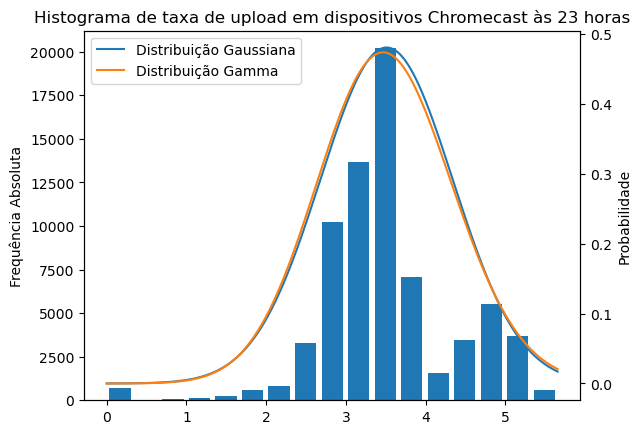

In [141]:
#Regra de Sturge's para numero de bins
n_bins = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_up_chromecast)))
print("Bins: " + str(n_bins))

cp_dtset = dataSet_maior_media_up_chromecast.copy().sort_values()

gauss = calcGaussiana(cp_dtset,med_up_chromecast,var_up_chromecast)

#DadosFUncaoGamaErrados
#gamma = calcGamma(dataSet_maior_media_up_chromecast,k_up_chromecast,t_up_chromecast)
gamma = calcGammaBib(cp_dtset,a_up_chromecast,loc_up_chromecast,scale_up_chromecast)

# Cria figura com eixo Y na esquerda (padrão), e plota dados nele
figure, left_ax = plt.subplots()
left_ax.hist(dataSet_maior_media_up_chromecast, n_bins, rwidth=0.8)
left_ax.set_ylabel('Frequência Absoluta')

# Cria eixo Y na direita e plota dados nele
right_ax = left_ax.twinx()
right_ax.plot(cp_dtset,gauss,label="Distribuição Gaussiana")
right_ax.plot(cp_dtset,gamma,label="Distribuição Gamma")
right_ax.set_ylabel('Probabilidade')


#plt.hist(dataSet_maior_media_down_chromecast, n_bins, rwidth=0.8)
#plt.plot(dataSet_maior_media_down_chromecast,gauss)
plt.title("Histograma de taxa de upload em dispositivos Chromecast às " + str(h_maior_media_upload_chromecast) + " horas")
#plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de download)')
plt.legend()
plt.show()

SmartTv download

Bins: 18


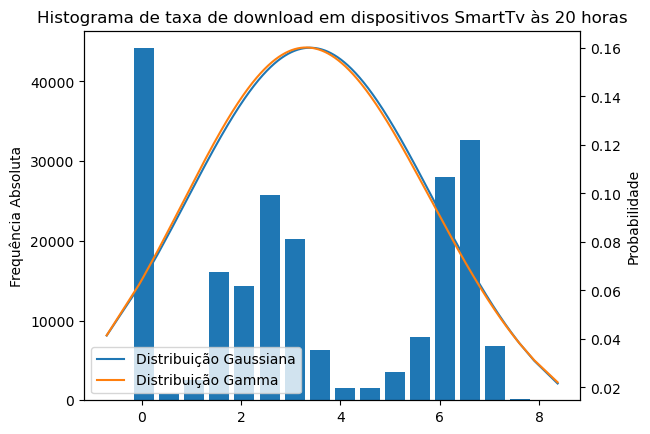

In [142]:
#Regra de Sturge's para numero de bins
n_bins = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_down_smartTv)))
print("Bins: " + str(n_bins))

cp_dtset = dataSet_maior_media_down_smartTv.copy().sort_values()

gauss = calcGaussiana(cp_dtset,med_down_smartTv,var_down_smartTv)

#DadosFUncaoGamaErrados
#gamma = calcGamma(dataSet_maior_media_down_smartTv,k_down_smartTv,t_down_smartTv)
gamma = calcGammaBib(cp_dtset,a_down_smartTv,loc_down_smartTv,scale_down_smartTv)

# Cria figura com eixo Y na esquerda (padrão), e plota dados nele
figure, left_ax = plt.subplots()
left_ax.hist(dataSet_maior_media_down_smartTv, n_bins, rwidth=0.8)
left_ax.set_ylabel('Frequência Absoluta')

# Cria eixo Y na direita e plota dados nele
right_ax = left_ax.twinx()
right_ax.plot(cp_dtset,gauss,label="Distribuição Gaussiana")
right_ax.plot(cp_dtset,gamma, label="Distribuição Gamma")
right_ax.set_ylabel('Probabilidade')


#plt.hist(dataSet_maior_media_down_chromecast, n_bins, rwidth=0.8)
#plt.plot(dataSet_maior_media_down_chromecast,gauss)
plt.title("Histograma de taxa de download em dispositivos SmartTv às " + str(h_maior_media_down_smartTv) + " horas")
#plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de download)')
plt.legend()
plt.show()

Upload SmartTv

Bins: 18


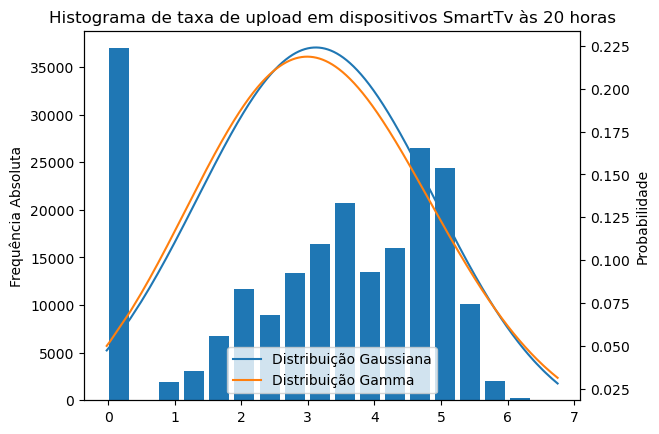

In [143]:
#Regra de Sturge's para numero de bins
n_bins = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_up_smartTv)))
print("Bins: " + str(n_bins))

cp_dtset = dataSet_maior_media_up_smartTv.copy().sort_values()

gauss = calcGaussiana(cp_dtset,med_up_smartTv,var_up_smartTv)

#DadosFUncaoGamaErrados
#gamma = calcGamma(dataSet_maior_media_up_smartTv,k_up_smartTv,t_up_smartTv)
gamma = calcGammaBib(cp_dtset,a_up_smartTv,loc_up_smartTv,scale_up_smartTv)

# Cria figura com eixo Y na esquerda (padrão), e plota dados nele
figure, left_ax = plt.subplots()
left_ax.hist(dataSet_maior_media_up_smartTv, n_bins, rwidth=0.8)
left_ax.set_ylabel('Frequência Absoluta')

# Cria eixo Y na direita e plota dados nele
right_ax = left_ax.twinx()
right_ax.plot(cp_dtset,gauss,label="Distribuição Gaussiana")
right_ax.plot(cp_dtset,gamma, label="Distribuição Gamma")
right_ax.set_ylabel('Probabilidade')


#plt.hist(dataSet_maior_media_down_chromecast, n_bins, rwidth=0.8)
#plt.plot(dataSet_maior_media_down_chromecast,gauss)
plt.title("Histograma de taxa de upload em dispositivos SmartTv às " + str(h_maior_media_upload_smartTv) + " horas")
#plt.ylabel('Frequência Absoluta')
plt.xlabel('Log10(Taxa de download)')
plt.legend()
plt.show()

Probability Plot

In [144]:
df_line_size = plt.rcParams['lines.markersize']
plt.rcParams['lines.markersize'] = 0.1

Upload Chromecast Gaussiana

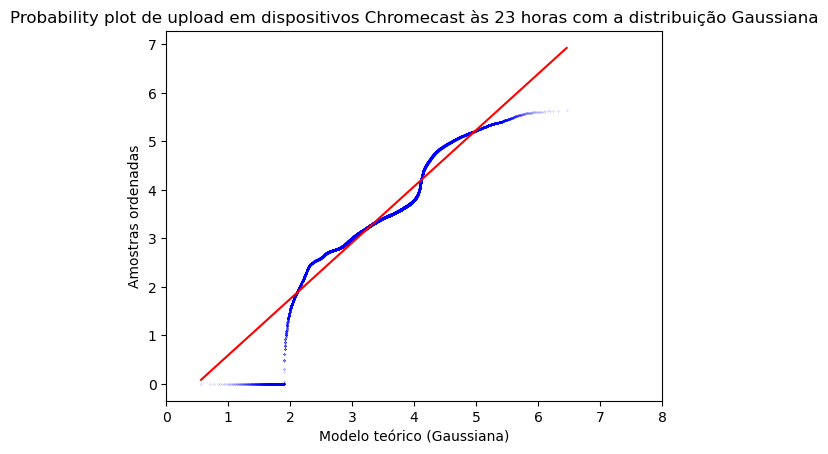

In [145]:

#fig = plt.figure()

#ax = fig.add_subplot(111)

ax = plt.subplot(111)

#x = stats.norm.rvs(loc=3, scale=4)

res = stats.probplot(dataSet_maior_media_up_chromecast,dist=stats.norm,sparams=(med_up_chromecast,var_up_chromecast),plot=plt)
#res = stats.probplot(x,plot=ax)
#ax.set_title("Probability plot da taxa de upload em dispositivos Chromecast às " + str(h_maior_media_upload_chromecast) + 
#             " horas com a distribuição Gaussiana de média " + str(round(med_up_chromecast,2)) + " e variância " + str(round(var_up_chromecast,2)))

ax.set_title("Probability plot de upload em dispositivos Chromecast às " + str(h_maior_media_upload_chromecast) + 
             " horas com a distribuição Gaussiana")
plt.xlabel("Modelo teórico (Gaussiana)")
plt.ylabel("Amostras ordenadas")
plt.xlim(0,8)
plt.show()

Upload Chromecast Gamma

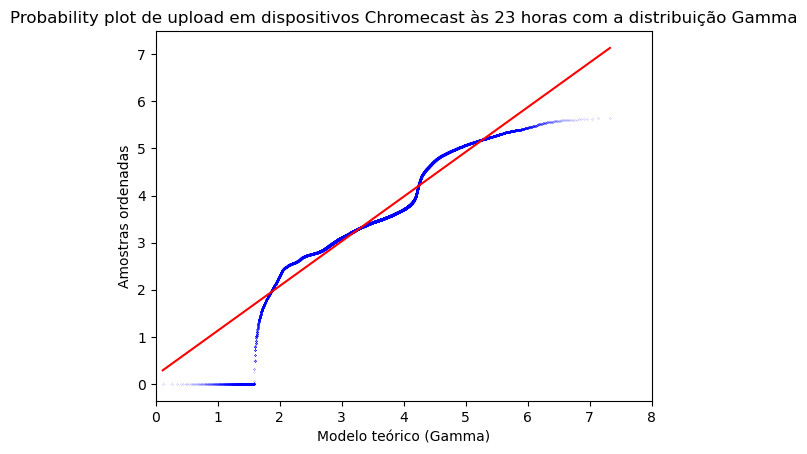

In [146]:

#fig = plt.figure()

#ax = fig.add_subplot(111)

ax = plt.subplot(111)

#x = stats.norm.rvs(loc=3, scale=4)

#res = stats.probplot(dataSet_maior_media_up_chromecast,dist=stats.gamma,sparams=(k_up_chromecast,1/t_up_chromecast),plot=ax)
res = stats.probplot(dataSet_maior_media_up_chromecast,dist=stats.gamma,sparams=(a_up_chromecast,loc_up_chromecast,scale_up_chromecast),plot=plt)
#res = stats.probplot(x,plot=ax)
ax.set_title("Probability plot de upload em dispositivos Chromecast às " + str(h_maior_media_upload_chromecast) + 
             " horas com a distribuição Gamma")

plt.xlabel("Modelo teórico (Gamma)")
plt.ylabel("Amostras ordenadas")
plt.xlim(0,8)
plt.show()

Download Chromecast Gaussiana

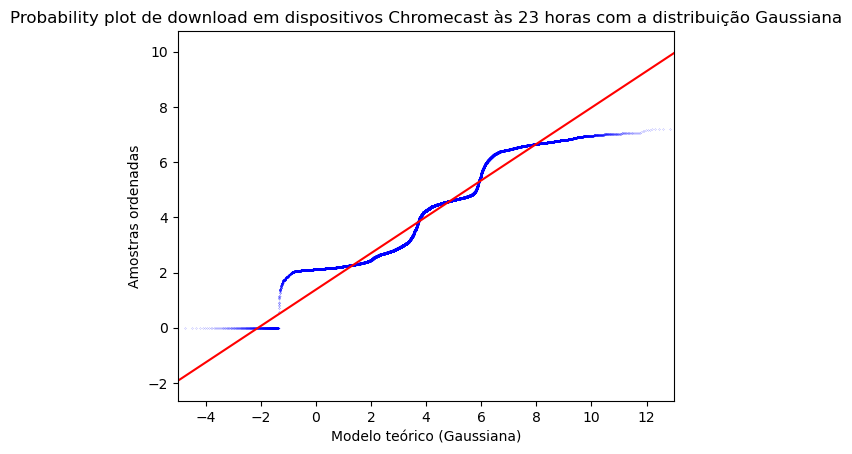

In [147]:
#fig = plt.figure()

#ax = fig.add_subplot(111)

ax = plt.subplot(111)

#x = stats.norm.rvs(loc=3, scale=4)

res = stats.probplot(dataSet_maior_media_down_chromecast,dist=stats.norm,sparams=(med_down_chromecast,var_down_chromecast),plot=plt)
#res = stats.probplot(x,plot=ax)
ax.set_title("Probability plot de download em dispositivos Chromecast às " + str(h_maior_media_down_chromecast) + 
             " horas com a distribuição Gaussiana")
plt.xlabel("Modelo teórico (Gaussiana)")
plt.ylabel("Amostras ordenadas")
plt.xlim(-5,13)
plt.show()


Download Chromecast Gamma

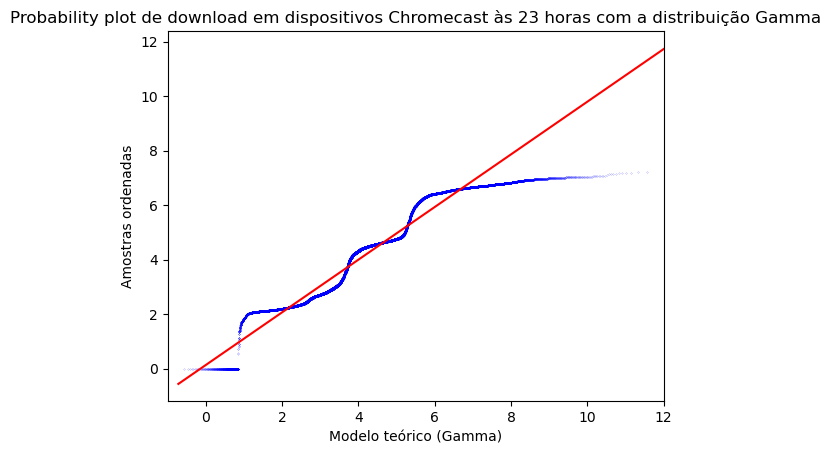

In [148]:
#fig = plt.figure()

#ax = fig.add_subplot(111)

ax = plt.subplot(111)

#x = stats.norm.rvs(loc=3, scale=4)

res = stats.probplot(dataSet_maior_media_down_chromecast,dist=stats.gamma,sparams=(a_down_chromecast,loc_down_chromecast,scale_down_chromecast),plot=plt)
#res = stats.probplot(x,plot=ax)
ax.set_title("Probability plot de download em dispositivos Chromecast às " + str(h_maior_media_down_chromecast) + 
             " horas com a distribuição Gamma")
plt.xlabel("Modelo teórico (Gamma)")
plt.ylabel("Amostras ordenadas")
plt.xlim(-1,12)
plt.show()


Upload SmartTv Gaussiana

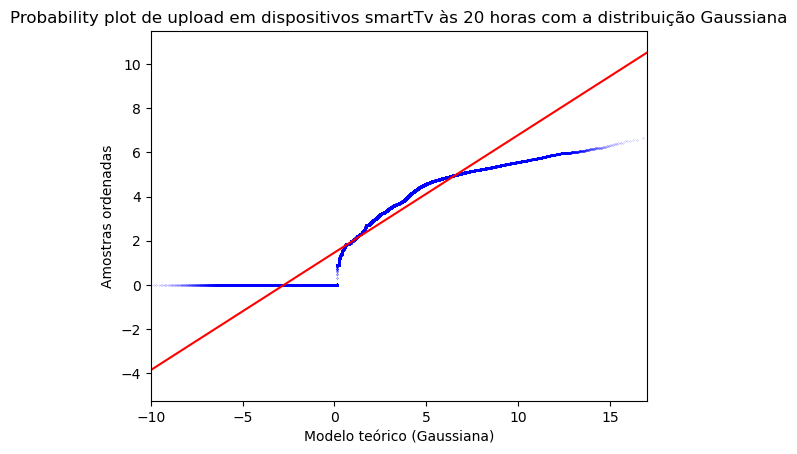

In [149]:
#fig = plt.figure()

#ax = fig.add_subplot(111)

ax = plt.subplot(111)
#x = stats.norm.rvs(loc=3, scale=4)

res = stats.probplot(dataSet_maior_media_up_smartTv,dist=stats.norm,sparams=(med_up_smartTv,var_up_smartTv),plot=plt)
#res = stats.probplot(x,plot=ax)
ax.set_title("Probability plot de upload em dispositivos smartTv às " + str(h_maior_media_upload_smartTv) + 
             " horas com a distribuição Gaussiana")
plt.xlabel("Modelo teórico (Gaussiana)")
plt.ylabel("Amostras ordenadas")
plt.xlim(-10,17)
plt.show()


Upload smartTv gamma

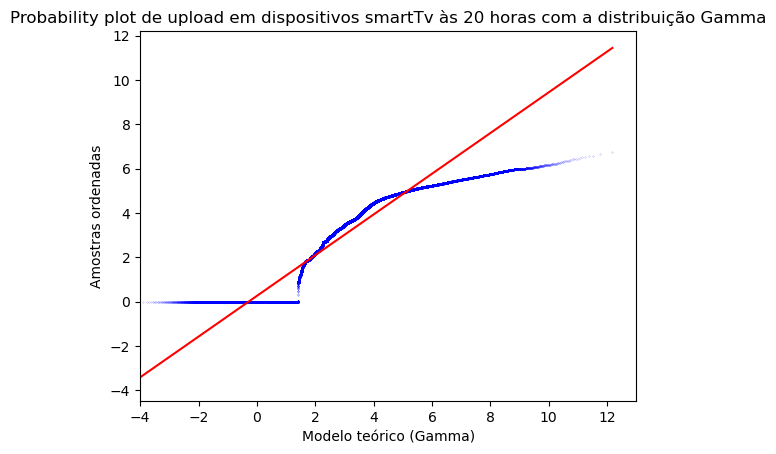

In [150]:
#fig = plt.figure()

#ax = fig.add_subplot(111)

ax = plt.subplot(111)

#x = stats.norm.rvs(loc=3, scale=4)

res = stats.probplot(dataSet_maior_media_up_smartTv,dist=stats.gamma,sparams=(a_up_smartTv,loc_up_smartTv,scale_up_smartTv),plot=plt)
#res = stats.probplot(x,plot=ax)
ax.set_title("Probability plot de upload em dispositivos smartTv às " + str(h_maior_media_upload_smartTv) + 
             " horas com a distribuição Gamma")
plt.xlabel("Modelo teórico (Gamma)")
plt.ylabel("Amostras ordenadas")
plt.xlim(-4,13)
plt.show()


Download SmartTv Gaussiana

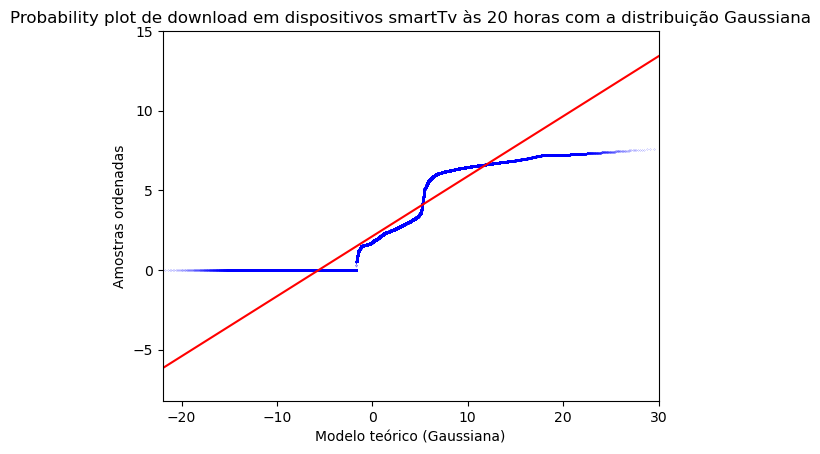

In [151]:
#fig = plt.figure()

#ax = fig.add_subplot(111)

ax = plt.subplot(111)

#x = stats.norm.rvs(loc=3, scale=4)

res = stats.probplot(dataSet_maior_media_down_smartTv,dist=stats.norm,sparams=(med_down_smartTv,var_down_smartTv),plot=plt)
#res = stats.probplot(x,plot=ax)
ax.set_title("Probability plot de download em dispositivos smartTv às " + str(h_maior_media_down_smartTv) + 
             " horas com a distribuição Gaussiana")
plt.xlabel("Modelo teórico (Gaussiana)")
plt.ylabel("Amostras ordenadas")
plt.xlim(-22,30)
plt.show()


Download SmartTv Gamma

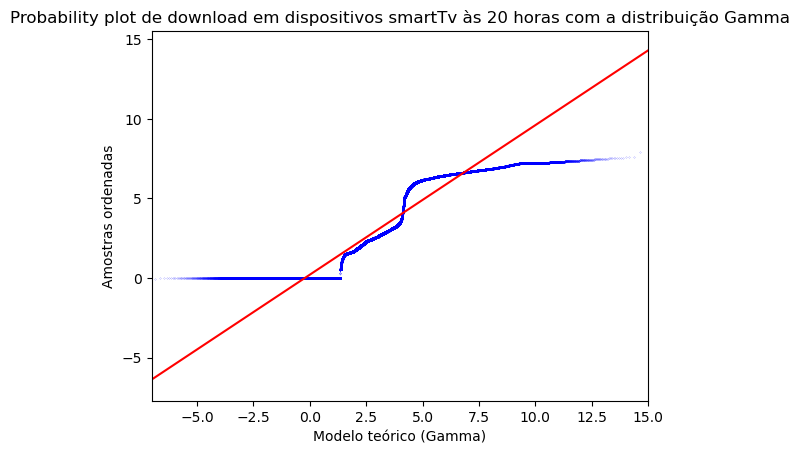

In [152]:
#fig = plt.figure()

#ax = fig.add_subplot(111)

ax = plt.subplot(111)

#x = stats.norm.rvs(loc=3, scale=4)

res = stats.probplot(dataSet_maior_media_down_smartTv,dist=stats.gamma,sparams=(a_down_smartTv,loc_down_smartTv,scale_down_smartTv),plot=plt)
#res = stats.probplot(x,plot=ax)
ax.set_title("Probability plot de download em dispositivos smartTv às " + str(h_maior_media_down_smartTv) + 
             " horas com a distribuição Gamma")
plt.xlabel("Modelo teórico (Gamma)")
plt.ylabel("Amostras ordenadas")
plt.xlim(-7,15)
plt.show()


In [153]:
plt.rcParams['lines.markersize'] = df_line_size

ANÁLISE CORRELAÇÃO

In [154]:
display("Correlação entre upload e download nos maior horário chromecast: " + str(dataSet_maior_media_up_chromecast.corr(other=dataSet_maior_media_down_chromecast)))

display("Correlação entre upload e download nos maior horário smartTv: " + str(dataSet_maior_media_up_smartTv.corr(other=dataSet_maior_media_down_smartTv)))


'Correlação entre upload e download nos maior horário chromecast: 0.7919586388345037'

'Correlação entre upload e download nos maior horário smartTv: 0.9154767447398351'

ScatterPlot Upload e Download Chromecast

In [155]:
df_line_size = plt.rcParams['lines.markersize']
plt.rcParams['lines.markersize'] = 0.1

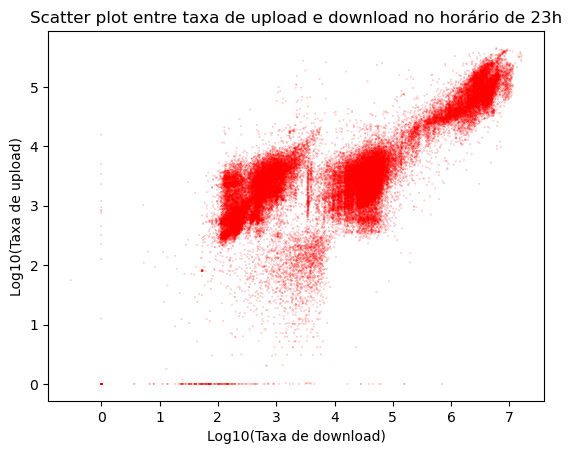

In [156]:
plt.scatter(dataSet_maior_media_down_chromecast,dataSet_maior_media_up_chromecast, facecolors='none',edgecolors='r')
plt.title("Scatter plot entre taxa de upload e download no horário de " + str(h_maior_media_upload_chromecast) +"h")
plt.ylabel('Log10(Taxa de upload)')
plt.xlabel('Log10(Taxa de download)')
plt.show()

ScatterPlot Upload e Download SmartTv

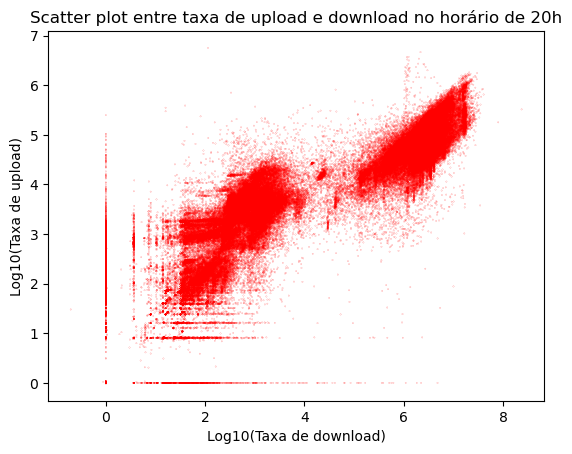

In [157]:
plt.scatter(dataSet_maior_media_down_smartTv,dataSet_maior_media_up_smartTv, facecolors='none',edgecolors='r')
plt.title("Scatter plot entre taxa de upload e download no horário de " + str(h_maior_media_upload_smartTv) + "h")
plt.ylabel('Log10(Taxa de upload)')
plt.xlabel('Log10(Taxa de download)')
plt.show()

In [158]:
plt.rcParams['lines.markersize'] = df_line_size

Chi-Square Godness of fit

Comparando Download

In [159]:
def sepBinsHist(data1,data2,n):
    mn1 = min(data1)
    mx1 = max(data1)

    mn2 = min(data2)
    mx2 = max(data2)

    mn = min(mn1,mn2)
    mx = max(mx1,mx2)

    t_bin = (mx - mn)/n

    res1 = [0]*n
    res2 = [0]*n

    for i in range(n):
        #print(str(np.round((mn + i*t_bin),2)) + " a " + str(np.round((mn +(i+1)*t_bin),2)))
        res1[i] = data1[(data1>=mn + i*t_bin) & (data1<mn +(i+1)*t_bin)].count()
        res2[i] = data2[(data2>=mn + i*t_bin) & (data2<mn +(i+1)*t_bin)].count()

    if max(data1) == mx:
        res1[-1] = res1[-1] +1
    if max(data2) == mx:
        res2[-1] = res2[-1] +1

    return res1,res2


def gCalc(observed,expected):
    G = 0
    for i in range(len(observed)):
        if (observed[i] != 0):
            G = G + observed[i]*math.log(observed[i]/expected[i])
    G = 2*G
    return G


def sepBinsPropHist(data1,data2,n):
    d1, d2 = sepBinsHist(data1,data2,n)
    return d1/sum(d1), d2/sum(d2)

In [162]:
#Regra de Sturge's para numero de bins
n_bins_smartTv = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_down_smartTv)))
n_bins_chromeCast = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_down_chromecast)))
display("numero de bins chromecast: " + str(n_bins_chromeCast))
display("numero de bins smartTv: " + str(n_bins_smartTv))

if (n_bins_smartTv != n_bins_chromeCast):
    a = max(n_bins_chromeCast,n_bins_smartTv)
    n_bins_chromeCast = a
    n_bins_smartTv = a
    display("numero de bins: " + str(a))

bins_down_smartTv, bins_down_chromecast = sepBinsHist(dataSet_maior_media_down_smartTv,dataSet_maior_media_down_chromecast,n_bins_smartTv)

bins_down_smartTv = (bins_down_smartTv/sum(bins_down_smartTv))*sum(bins_down_chromecast)
#bins_down_chromecast = (bins_down_chromecast/sum(bins_down_chromecast))

G = gCalc(bins_down_chromecast,bins_down_smartTv)


  
# find Chi-Square critical value 
#print(stats.chi2.ppf(1-0.05, df=(n_bins_smartTv-1)))
print("p-valor: " + str(1-stats.chi2.cdf(G, df=(n_bins_smartTv-1))))
print("G: " + str(G)) 

'numero de bins chromecast: 17'

'numero de bins smartTv: 18'

'numero de bins: 18'

p-valor: 0.0
G: 162168.88643468622


Comparando Upload

In [163]:
#Regra de Sturge's para numero de bins
n_bins_smartTv = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_up_smartTv)))
n_bins_chromeCast = math.trunc(1 + 3.3*math.log10(len(dataSet_maior_media_up_chromecast)))
display("numero de bins chromecast: " + str(n_bins_chromeCast))
display("numero de bins smartTv: " + str(n_bins_smartTv))

if (n_bins_smartTv != n_bins_chromeCast):
    a = max(n_bins_chromeCast,n_bins_smartTv)
    n_bins_chromeCast = a
    n_bins_smartTv = a
    display("numero de bins: " + str(a))

bins_up_smartTv, bins_up_chromecast = sepBinsHist(dataSet_maior_media_up_smartTv,dataSet_maior_media_up_chromecast,n_bins_smartTv)

bins_up_smartTv = (bins_up_smartTv/sum(bins_up_smartTv))*sum(bins_up_chromecast)


G = gCalc(bins_up_chromecast,bins_up_smartTv)


  
# find Chi-Square critical value 
#print(stats.chi2.ppf(1-0.05, df=(n_bins_smartTv-1))) 
print("p-valor: " + str(1-stats.chi2.cdf(G, df=(n_bins_smartTv-1))))
print("G: " + str(G)) 

'numero de bins chromecast: 17'

'numero de bins smartTv: 18'

'numero de bins: 18'

p-valor: 0.0
G: 73762.1084895751
